In [51]:
import networkx as nx
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import random
import time
import re

In [ ]:
def choose_by_degree(G):
    tmp_edges = list(G.edges())
    idx = random.randint(0,len(tmp_edges)-1)
    chosen_node = tmp_edges[idx][0]
    return chosen_node

In [ ]:
def old_choose_by_degree(G, a):
    random_list = []
    for node in G.nodes():
        for i in range(G.degree(node)):
            random_list.append(node)
        for j in range(a):
            random_list.append(node)
#     print(random_list)
    random.shuffle(random_list)
    return(random_list[0])

In [ ]:
def preferential_attachment(G, a):
    # Manually calculate the mean degree of a directed graph
#     degrees = [G.in_degree(node) for node in G]
#     c = np.mean(degrees)
    c = 3
    new_node = G.number_of_nodes()
    
    if G.number_of_nodes == 1:
        print(degrees)
    r = random.random()
    if r < float(c) / float(c + a):
        chosen_node = choose_by_degree(G)
    else:
        chosen_node = random.randint(0, new_node - 1)
    # Add new node connected to chosen node.
#     print("Chosen Node: {}".format(chosen_node))
#     print("Adding Node: {}".format(new_node))
#     print("Adding Edge From {} to {}".format(new_node, chosen_node))
    G.add_node(new_node)
    G.add_edge(new_node, chosen_node)
#     if (new_node, chosen_node) not in G.edges():
#         print("Could not add edge {}".format((G.number_of_nodes(), chosen_node)))
#         print("existing nodes: {}".format(G.nodes()))
#     figure = plt.figure(figsize=(10, 10))
#     nx.draw(G, with_labels=True)
    return(G)

In [ ]:
def main():
    a = 1
    toc = time.time()
    # Create a 4 clique seed graph as in example
    G = nx.DiGraph()
    for i in range(4):
        G.add_node(i)
    for i in range(4):
        for j in range(4):
            if i != j:
                G.add_edge(i, j)
#     nx.draw(G)
    while G.number_of_nodes() < 1000000:
        if G.number_of_nodes() % 100 == 0:
            print(G.number_of_nodes())
        G = preferential_attachment(G, a)
    print(time.time() - toc)
#     figure = plt.figure(figsize=(10, 10))
#     nx.draw(G)
    return G

In [ ]:
G = main()

## New Preferential Attachment

In [16]:
def preferential_attachement_2(n, c, a):
    p = float(c) / float(c+a)
    graph = [0 for i in range(c * n)]
#     print("The length of the graph is: {}".format(len(graph)))
    # Seed Graph
    graph[0:11] = [1, 2, 3, 0, 2, 3, 0, 1, 3, 0, 1, 2]
    for t in range(4,n):
        for j in range(c):
            if random.random() < p:
                d = graph[random.randint(0, c*(t-1))]
            else:
                d = random.randint(0, t-1)
#             print("Value being appended: {}".format(d))
#             print("Attempting to fill element: {}".format(c*(t)+j))
            graph[c*(t)+(j+1)] = d
    return graph

In [17]:
def plot_ccdf(edges):
    vals = [i for i in range(1000000)]
    degs = np.histogram(edges, vals)
    hx = [i for i in range(max(degs[0]))]
    
    hc = np.histogram(degs[0], hx)
    hc_0 = hc[0]
    yvals = [0]
    for val in hc_0:
        yvals.append(val)
    hc_0 = np.array(yvals)
        
    hc_1 = hc[1]
    hc_0 = hc_0 / 1000000
#     hc_1 = hc_1 / 1000000
    print("HC 0")
    print(hc_0)
    print("HC 1")
    print(hc_1)
    print("CumSum")
    print(np.cumsum(hc_0))
    print("CCDF")
    print(1 - np.cumsum(hc_0))
    
    # Plotting
    x = hc_1
    y = 1 - np.cumsum(hc_0)
    fig = plt.figure()
    ax = plt.subplot()
    ax.scatter(x=x, y=y)
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_ylim(1e-6, 1e0)
    ax.set_xlim(1e0, 1e5)
    return x, y, hc

In [18]:
a_1 = preferential_attachement_2(1000000, 3, 1)
a_2 = preferential_attachement_2(1000000, 3, 2)
a_3 = preferential_attachement_2(1000000, 3, 3)
a_4 = preferential_attachement_2(1000000, 3, 4)

HC 0
[ 0.        0.571476  0.171149 ...,  0.        0.        0.      ]
HC 1
[    0     1     2 ..., 55991 55992 55993]
CumSum
[ 0.        0.571476  0.742625 ...,  0.999998  0.999998  0.999998]
CCDF
[  1.00000000e+00   4.28524000e-01   2.57375000e-01 ...,   2.00000000e-06
   2.00000000e-06   2.00000000e-06]


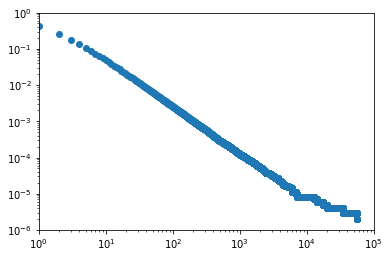

In [19]:
x_1, y_1, hc_1 = plot_ccdf(a_1)

In [20]:
hc_1

(array([571476, 171149,  79122, ...,      0,      0,      0]),
 array([    0,     1,     2, ..., 55991, 55992, 55993]))

HC 0
[ 0.        0.454539  0.194538 ...,  0.        0.        0.      ]
HC 1
[    0     1     2 ..., 11979 11980 11981]
CumSum
[ 0.        0.454539  0.649077 ...,  0.999998  0.999998  0.999998]
CCDF
[  1.00000000e+00   5.45461000e-01   3.50923000e-01 ...,   2.00000000e-06
   2.00000000e-06   2.00000000e-06]


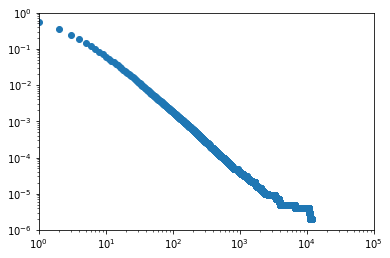

In [21]:
x_2, y_2, hc_2 = plot_ccdf(a_2)

In [22]:
hc_2

(array([454539, 194538, 103726, ...,      0,      0,      0]),
 array([    0,     1,     2, ..., 11979, 11980, 11981]))

HC 0
[ 0.        0.400236  0.19881  ...,  0.        0.        0.      ]
HC 1
[   0    1    2 ..., 3640 3641 3642]
CumSum
[ 0.        0.400236  0.599046 ...,  0.999998  0.999998  0.999998]
CCDF
[  1.00000000e+00   5.99764000e-01   4.00954000e-01 ...,   2.00000000e-06
   2.00000000e-06   2.00000000e-06]


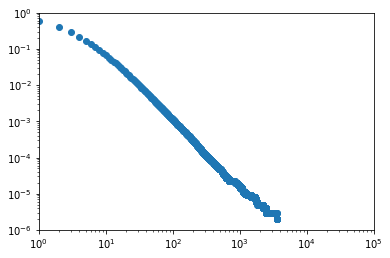

In [23]:
x_3, y_3, hc_3 = plot_ccdf(a_3)

In [24]:
hc_3

(array([400236, 198810, 115030, ...,      0,      0,      0]),
 array([   0,    1,    2, ..., 3640, 3641, 3642]))

HC 0
[ 0.        0.368632  0.200841 ...,  0.        0.        0.      ]
HC 1
[   0    1    2 ..., 2607 2608 2609]
CumSum
[ 0.        0.368632  0.569473 ...,  0.999998  0.999998  0.999998]
CCDF
[  1.00000000e+00   6.31368000e-01   4.30527000e-01 ...,   2.00000000e-06
   2.00000000e-06   2.00000000e-06]


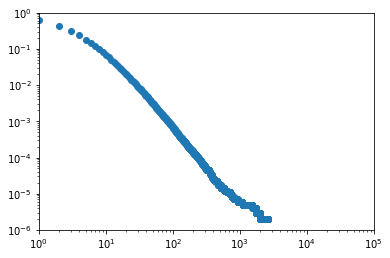

In [25]:
x_4, y_4, hc_4 = plot_ccdf(a_4)

In [26]:
hc_4

(array([368632, 200841, 120502, ...,      0,      0,      0]),
 array([   0,    1,    2, ..., 2607, 2608, 2609]))

### One Figure (1a)

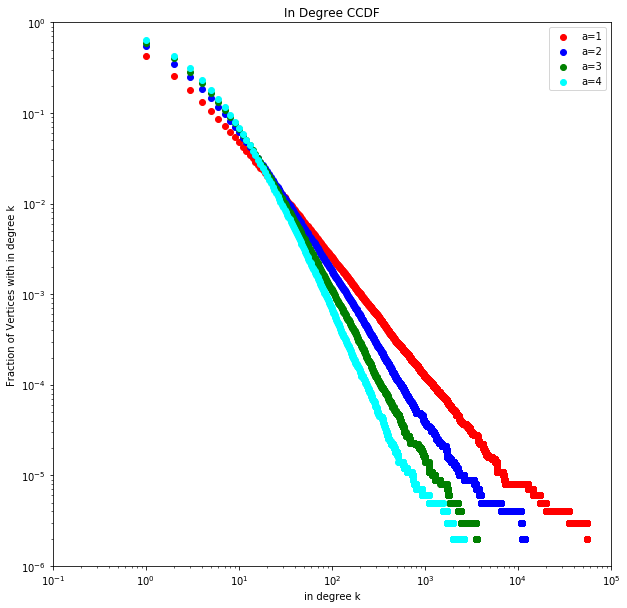

In [27]:
fig = plt.figure(figsize=(10, 10))
ax = plt.subplot()
gift_1 = ax.scatter(x=x_1, y=y_1, color='red', label='a=1')
gift_2 = ax.scatter(x=x_2, y=y_2, color='blue', label='a=2')
gift_3 = ax.scatter(x=x_3, y=y_3, color='green', label='a=3')
gift_4 = ax.scatter(x=x_4, y=y_4, color='cyan', label='a=4')

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim(1e-6, 1e0)
ax.set_xlim(1e-1, 1e5)
ax.set_title("In Degree CCDF")
ax.set_ylabel("Fraction of Vertices with in degree k")
ax.set_xlabel("in degree k")
ax.legend()

### 1b

In [105]:
a_5 = preferential_attachement_2(1000000, 12, 5)

In [106]:
first_10 = {}
last_10 = {}

# Create counting dictionaries
for i in range(100000):
    first_10[i] = 0
for i in range(900000, 1000000):
    last_10[i] = 0

for val in a_5:
    if val in range(100000):
        first_10[val] += 1
    if val in range(900000, 1000000):
        last_10[val] += 1

In [107]:
np.mean(list(first_10.values()))

81.355040000000002

In [108]:
np.mean(list(last_10.values()))

0.18704000000000001

### 1c

In [165]:
# Load the dates dataset
def get_dates_data():
    dates = []
    with open("NetworkData2/cit-HepPh-dates.txt") as f:
        reader = csv.reader(f, delimiter='\t')
        for row in reader:
            dates.append(row)
        f.close()
    # Remove non-date entries...
    dates = dates[1:]

    # Convert each row to a tuple of ints.
    dates_2 = []
    for date in dates:
        # Remove preceding ones on large values
        if len(date[0]) == 9:
            paper_id = int(date[0][2:])
        else:
            paper_id = int(date[0])
        paper_date = int(re.sub(pattern='-', repl='', string=date[1]))
        dates_2.append([paper_id, paper_date])

    # Remove duplicat dates
    observed_ids = []
    final_dates = []
    counter = 0
    for date in dates_2:
        if date[0] in observed_ids:
            print("ID: {}".format(date[0]))
            counter += 1
            continue
        else:
            observed_ids.append(date[0])
            final_dates.append(date)
    print("Number of duplicate dates: {}".format(counter))
    return final_dates

In [166]:
final_dates = get_dates_data()

ID: 9210007
ID: 9210008
ID: 9211004
ID: 9211008
ID: 9211011
ID: 9301002
ID: 9302002
ID: 9302003
ID: 9303005
ID: 9303014
ID: 9304017
ID: 9304023
ID: 9306009
ID: 9306012
ID: 9306014
ID: 9306024
ID: 9307002
ID: 9307025
ID: 9310001
ID: 9310010
ID: 9310001
ID: 9310008
ID: 9310018
ID: 9311038
ID: 9312013
ID: 9312022
ID: 9401007
ID: 9401002
ID: 9401003
ID: 9401020
ID: 9402010
ID: 9402017
ID: 9402018
ID: 9402021
ID: 9404005
ID: 9404015
ID: 9405004
ID: 9405036
ID: 9405001
ID: 9405002
ID: 9405012
ID: 9405024
ID: 9406208
ID: 9406016
ID: 9406026
ID: 9406029
ID: 9408023
ID: 9408099
ID: 9408005
ID: 9408023
ID: 9409055
ID: 9409017
ID: 9410001
ID: 9410094
ID: 9410206
ID: 9410210
ID: 9410212
ID: 9410223
ID: 9410231
ID: 9410242
ID: 9411080
ID: 9411201
ID: 9411228
ID: 9411230
ID: 9411231
ID: 9411239
ID: 9411021
ID: 9412013
ID: 9412055
ID: 9412201
ID: 9412204
ID: 9412205
ID: 9501065
ID: 9501024
ID: 9502052
ID: 9502080
ID: 9502003
ID: 9503068
ID: 9503047
ID: 9503002
ID: 9503017
ID: 9503220
ID: 9503003
ID: 

ID: 9905040
ID: 9906210
ID: 9906232
ID: 9906309
ID: 9906327
ID: 9906431
ID: 9906432
ID: 9906450
ID: 9906451
ID: 9906463
ID: 9906481
ID: 9906497
ID: 9906027
ID: 9906001
ID: 9906004
ID: 9906009
ID: 9906206
ID: 9906218
ID: 9906222
ID: 9906228
ID: 9906236
ID: 9906245
ID: 9906246
ID: 9906003
ID: 9906008
ID: 9906028
ID: 9906034
ID: 9906056
ID: 9907221
ID: 9907223
ID: 9907340
ID: 9907347
ID: 9907388
ID: 9907420
ID: 9907421
ID: 9907422
ID: 9907014
ID: 9907203
ID: 9907208
ID: 9907209
ID: 9907224
ID: 9907225
ID: 9907026
ID: 9907037
ID: 9907051
ID: 9907073
ID: 9908219
ID: 9908276
ID: 9908451
ID: 9908005
ID: 9908052
ID: 9908013
ID: 9908023
ID: 9908013
ID: 9908014
ID: 9908044
ID: 9908052
ID: 9909221
ID: 9909234
ID: 9909320
ID: 9909339
ID: 9909376
ID: 9909386
ID: 9909445
ID: 9909454
ID: 9909480
ID: 9909240
ID: 9909249
ID: 9909279
ID: 9909310
ID: 9909085
ID: 9909001
ID: 9909001
ID: 9909103
ID: 9909201
ID: 9909205
ID: 9909212
ID: 9909221
ID: 9909011
ID: 9909018
ID: 9909035
ID: 9909078
ID: 9909082
ID: 

In [167]:
len(final_dates)

37201

In [151]:
def get_citations():
    # Load the citation dataset
    citations = []
    with open("NetworkData2/Cit-HepPh.txt") as f:
        reader = csv.reader(f, delimiter='\t')
        for row in reader:
            citations.append(row)
        f.close()
    
    # Remove non-data entries
    citations = citations[4:]
    
    # Convert date ID's to ints
    citations = [[int(cit[0]), int(cit[1])] for cit in citations]
    return citations

In [152]:
def filter_from_citations(dates, citations):
    # Create a set of id's
    date_ids = [date[0] for date in dates]
    
    # Only consider papers which are listed in the dates dataset
    final_citations = []
    removed_citations = []
    for citation in citations:
        if citation[0] in date_ids and citation[1] in date_ids:
            final_citations.append(citation)
        else:
            removed_citations.append(citation)
    print("Original number of citations: {}".format(len(citations)))
    print("Final number of citations: {}".format(len(final_citations)))
    return final_citations,removed_citations

In [153]:
dates = get_dates_data()
citations = get_citations()
final_citations, removed_citations = filter_from_citations(dates, citations)

Original number of citations: 421578
Final number of citations: 347268


Get 30558 nodes

In [159]:
# Create a set of id's
date_ids = [date[0] for date in dates]

# Only consider papers which are listed in the dates dataset
final_citations_30558 = []
removed_citations = []
for citation in citations:
    if citation[0] in final_nodes and citation[1] in final_nodes:
        final_citations_30558.append(citation)
    else:
        removed_citations.append(citation)
print("Original number of citations: {}".format(len(citations)))
print("Final number of citations: {}".format(len(final_citations_30558)))

final_citations_30558

Original number of citations: 421578
Final number of citations: 347268


[[9907233, 9301253],
 [9907233, 9504304],
 [9907233, 9505235],
 [9907233, 9506257],
 [9907233, 9606402],
 [9907233, 9607354],
 [9907233, 9611297],
 [9907233, 9702314],
 [9907233, 9704296],
 [9907233, 9803214],
 [9907233, 9903217],
 [9704296, 9311274],
 [9704296, 9502335],
 [9704296, 9606402],
 [9704296, 9607354],
 [9704296, 9611296],
 [9704296, 9611297],
 [9704296, 9612258],
 [9606402, 9301203],
 [9606402, 9301206],
 [9606402, 9502274],
 [9606402, 9503474],
 [9606402, 9505235],
 [9607354, 9504304],
 [9607354, 9505235],
 [9607354, 9606402],
 [9702314, 9302247],
 [9702314, 9501357],
 [9702314, 9501384],
 [9702314, 9502366],
 [9702314, 9504372],
 [9702314, 9511210],
 [9702314, 9610453],
 [9803214, 9301253],
 [9803214, 9702314],
 [9803214, 9706487],
 [9506257, 9311274],
 [9611297, 9211239],
 [9611297, 9302217],
 [9611297, 9405341],
 [9611297, 9409335],
 [9611297, 9409371],
 [9611297, 9411285],
 [9611297, 9504304],
 [9611297, 9505235],
 [9611297, 9508393],
 [9611297, 9602366],
 [9611297, 96

In [136]:
def count_unique_nodes(citations):
    node_counter = []
    for citation in citations:
        node_counter.append(citation[0])
        node_counter.append(citation[1])
    print(len(set(node_counter)))
    return(set(node_counter))

In [130]:
def get_citation_nodes(citations):
    from_ids = [cit[0] for cit in citations]
    to_ids = [cit[1] for cit in citations]
    node_count = set(from_ids).union(set(to_ids))
    print(len(node_count))
    return node_count

In [129]:
def get_node_ids(dates, citation_nodes):
    date_ids = [date[0] for date in dates]
    final_nodes = set(date_ids).intersection(citation_nodes)
    print(len(final_nodes))
    return final_nodes

In [154]:
citation_nodes = get_citation_nodes(citations)
final_nodes = get_node_ids(dates, citation_nodes)

34546
30558


In [155]:
count_unique_nodes(final_nodes)

TypeError: 'int' object is not subscriptable

In [137]:
count_unique_nodes(final_citations)

30501


{104207,
 104208,
 104209,
 104212,
 104213,
 104214,
 104215,
 104216,
 104219,
 104222,
 9306201,
 9306202,
 9306203,
 9306204,
 9306205,
 9306206,
 9306207,
 9306208,
 9306209,
 9306210,
 9306211,
 9306212,
 9306213,
 9306214,
 9306215,
 9306216,
 9306219,
 9306220,
 9306222,
 9306224,
 9306226,
 9306227,
 9306228,
 9306229,
 9306230,
 9306231,
 9306232,
 104229,
 9306235,
 9306236,
 9306237,
 9306238,
 9306240,
 9306241,
 9306242,
 9306244,
 9306245,
 9306247,
 9306248,
 104233,
 9306249,
 9306251,
 9306252,
 9306253,
 9306254,
 9306255,
 9306256,
 9306257,
 9306258,
 9306259,
 9306260,
 104234,
 9306262,
 9306263,
 9306264,
 9306265,
 9306266,
 9306267,
 9306268,
 9306269,
 9306270,
 9306271,
 9306276,
 9306277,
 9306278,
 9306279,
 9306280,
 9306281,
 9306282,
 9306283,
 9306284,
 9306285,
 9306286,
 9306287,
 9306288,
 9306289,
 9306290,
 9306291,
 9306292,
 9306293,
 9306294,
 9306295,
 9306296,
 9306297,
 9306298,
 9306299,
 104243,
 9306301,
 9306302,
 9607456,
 9306304,
 930

In [148]:
dates_df = pd.DataFrame(dates)
dates_df.columns = ['id', 'date']
dates_df = dates_df.sort_values(by='date', ascending=True)
dates_df.reset_index(inplace=True, drop=True)

In [149]:
dates_df

id      date
0        9211202  19920211
1        9203201  19920224
2        9203203  19920303
3        9203202  19920308
4        9203204  19920309
5        9203205  19920309
6        9203206  19920309
7        9203207  19920310
8        9203208  19920310
9        9203209  19920311
10       9203210  19920315
11       9203214  19920316
12       9203212  19920316
13       9203211  19920316
14       9203213  19920317
15       9203215  19920318
16       9203216  19920318
17       9203217  19920318
18       9203218  19920319
19     119203060  19920321
20       9203219  19920324
21       9203220  19920326
22       9203221  19920326
23       9203222  19920327
24       9203223  19920329
25       9203224  19920330
26       9203225  19920330
27       9203226  19920331
28       9204202  19920401
29       9204203  19920401
...          ...       ...
37591     203086  20020308
37592     203085  20020308
37593     203084  20020308
37594     203083  20020308
37595     203082  20020308
37596     203081  20020308
37597     203088  20020308
37598   11203137  20020308
37599     203093  20020309
37600     203094  20020309
37601   11203032  20020310
37602   11203149  20020310
37603     203097  20020310
37604     203099  20020310
37605     203098  20020310
37606     203102  20020311
37607     203095  20020311
37608     203096  20020311
37609   11203164  20020311
37610   11203090  20020311
37611     203101  20020311
37612   11203023  20020311
37613     203100  20020311
37614     203105  20020311
37615     203104  20020311
37616     203103  20020311
37617     203108  20020312
37618     203109  20020312
37619     203106  20020312
37620     203107  20020312

[37621 rows x 2 columns]

In [142]:
def compute_1c_values(dates, citations):
    dates_df = pd.DataFrame(dates)
    dates_df.columns = ['id', 'date']
    dates_df = dates_df.sort_values(by='date', ascending=True)
    dates_df.reset_index(inplace=True, drop=True)
    
    # The right column of citations is the older paper.
    num_entries = dates_df.shape[0]
    ten_percent = int(np.round(float(num_entries) / float(10)))
    
    first_10_ids = []
    for i in range(ten_percent):
        first_10_ids.append(dates_df.iloc[i].id)
    last_10_ids = []
    
    for i in range(num_entries - ten_percent, num_entries):
        last_10_ids.append(dates_df.iloc[i].id)

    first_10 = {}
    last_10 = {}

    # Create counting dictionaries
    for citation_id in first_10_ids:
        first_10[citation_id] = 0
    for citation_id in last_10_ids:
        last_10[citation_id] = 0

    for val in citations:
        if val[1] in first_10_ids:
            first_10[val[1]] += 1
        if val[1] in last_10_ids:
            last_10[val[1]] += 1
    first_10_mean = np.mean(list(first_10.values()))
    last_10_mean = np.mean(list(last_10.values()))
    return first_10_mean, last_10_mean, first_10, last_10

30558

In [168]:
first_10_mean, last_10_mean, first_10, last_10 = compute_1c_values(dates, final_citations_30558)

ValueError: not enough values to unpack (expected 4, got 2)

In [161]:
first_10_mean

16.443817204301077

In [162]:
last_10_mean

1.4776881720430108

30501

In [143]:
first_10_mean, last_10_mean = compute_1c_values(dates, citations)

In [144]:
first_10_mean

17.480861244019138

In [145]:
last_10_mean

4.6068580542264757

### 1e

In [ ]:
def preferential_attachement_3(n, c, a):
    p = float(c) / float(c+a)
    graph = [0 for i in range(c * n)]
#     print("The length of the graph is: {}".format(len(graph)))
    # Seed Graph
    graph[0:11] = [1, 2, 3, 0, 2, 3, 0, 1, 3, 0, 1, 2]
    for t in range(4,n):
        for j in range(c):
            d = random.randint(0, t-1)
#             print("Value being appended: {}".format(d))
#             print("Attempting to fill element: {}".format(c*(t)+j))
            graph[c*(t)+(j+1)] = d
    return graph

In [ ]:
a_uniform_1 = preferential_attachement_3(1000000, 3, 1)
a_uniform_4 = preferential_attachement_3(1000000, 3, 4)

In [33]:
final_ids

['11203023',
 '11203090',
 '11203005',
 '11203009',
 '11203032',
 '11203164',
 '11203149',
 '0203109',
 '0203108',
 '0203107',
 '0203106',
 '11203010',
 '11203058',
 '11203137',
 '0203105',
 '0203104',
 '0203103',
 '0203102',
 '0203101',
 '0203100',
 '0203099',
 '0203098',
 '0203097',
 '0203096',
 '0203095',
 '0203094',
 '0203093',
 '0203092',
 '11203055',
 '11203088',
 '0203091',
 '0203090',
 '0203089',
 '0203088',
 '0203087',
 '0203086',
 '0203085',
 '0203084',
 '0203083',
 '0203082',
 '0203081',
 '0203080',
 '0203079',
 '0203078',
 '0203077',
 '11203011',
 '11203045',
 '11203039',
 '11203004',
 '11203003',
 '0203076',
 '0203075',
 '0203074',
 '0203073',
 '0203072',
 '0203071',
 '0203070',
 '0203069',
 '11203037',
 '11203036',
 '0203068',
 '0203067',
 '0203066',
 '0203065',
 '0203064',
 '0203063',
 '0203062',
 '0203061',
 '0203060',
 '0203059',
 '0203058',
 '0203057',
 '0203056',
 '0203055',
 '11203013',
 '11203007',
 '11203006',
 '0203054',
 '0203053',
 '0203052',
 '0203051',
 '0203

In [ ]:
x_uni, y_uni, hc_uni = plot_ccdf(a_uniform_1)

In [ ]:
fig = plt.figure(figsize=(10, 10))
ax = plt.subplot()
gift_1 = ax.scatter(x=x_1, y=y_1, color='red', label='a=1')
gift_2 = ax.scatter(x=x_uni, y=y_uni, color='blue', label='uniform')
gift_4 = ax.scatter(x=x_4, y=y_4, color='cyan', label='a=4')

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim(1e-6, 1e0)
ax.set_xlim(1e-1, 1e5)
ax.set_title("In Degree CCDF")
ax.set_ylabel("Fraction of Vertices with in degree k")
ax.set_xlabel("in degree k")
ax.legend()

In [ ]:
# Brad hayes

In [ ]:
len(double_dates)

In [ ]:
len(found_dates)

In [16]:
len(found_dates)

38557